In [115]:
# import main lib for machine learning

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

In [116]:
 # Define paths to your dataset
base_path = '/Users/msalah/Downloads/triple_mnist/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')

**Import the data from the excel file**

In [117]:
import os
from PIL import Image

def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_folders = sorted(os.listdir(folder_path))  # Assumes class folders are named by numbers or labels
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                if img_path.endswith('.jpg') or img_path.endswith('.png'):  # Adjust based on your image formats
                    try:
                        img = Image.open(img_path)
                        img = np.array(img)  # Convert PIL Image to numpy array
                        images.append(img)
                        #labels.append(int(class_folder))  # Assuming class folders are named numerically
                        labels.append([int(digit) for digit in class_folder])  # Convert class_folder name to list of digits

                    except Exception as e:
                        print(f"Error loading image: {img_path}. {e}")
    return images, labels


In [118]:


def load_and_prepare_data():
    global x_train, y_train, x_test, y_test, x_val, y_val
    
   

    # Load images and labels for train, test, and val sets
    x_train, y_train = load_images_from_folder(train_path)
    x_test, y_test = load_images_from_folder(test_path)
    x_val, y_val = load_images_from_folder(val_path)

    # Convert lists to numpy arrays for easier manipulation
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_val = np.array(x_val)

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    # Print out the shapes to verify
    print(f"Train images shape: {x_train.shape}, Train labels shape: {y_train.shape}")
    print(f"Test images shape: {x_test.shape}, Test labels shape: {y_test.shape}")
    print(f"Val images shape: {x_val.shape}, Val labels shape: {y_val.shape}")


load_and_prepare_data()


Train images shape: (64000, 84, 84), Train labels shape: (64000, 3)
Test images shape: (20000, 84, 84), Test labels shape: (20000, 3)
Val images shape: (16000, 84, 84), Val labels shape: (16000, 3)


/Users/msalah/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


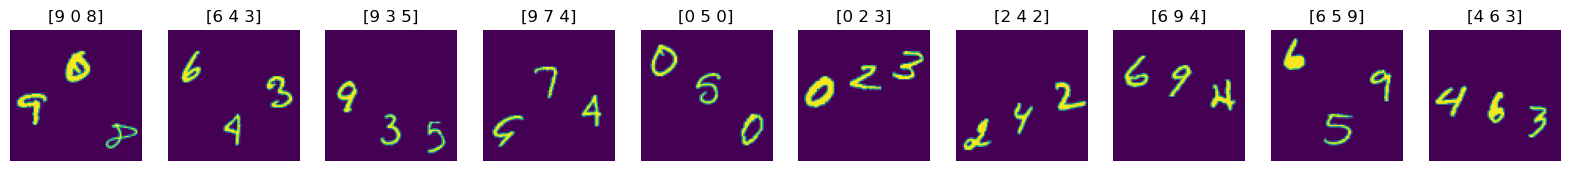

In [119]:

# print a couple of images from x_train data

from random import Random
rand = Random()
plt.figure(figsize=(20, 2))
for i in range(0, 10):
    plt.subplot(1,10, i + 1)
    x = rand.randint(0, len(x_train) - 1)  # select a random index from x_train data
    plt.imshow(x_train[x])
    plt.title(y_train[x])
    plt.axis('off')
plt.show()

In [120]:
# Discover y_train
distinct_labels = np.unique(y_train)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [121]:
 #Discover y_test
distinct_labels = np.unique(y_test)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [122]:
#discover y_val
distinct_labels = np.unique(y_val)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
inputs = Input(shape=(84, 84, 1))

# Convolutional layers
x = Conv2D(64, kernel_size=(6, 6), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3, 3))(x)
x = Conv2D(32, kernel_size=(6, 6), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(6, 6), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)  # Adding Dropout layer
x = Flatten()(x)

# Output layers for each digit
digit1 = Dense(10, activation='softmax', name='digit1')(x)
digit2 = Dense(10, activation='softmax', name='digit2')(x)
digit3 = Dense(10, activation='softmax', name='digit3')(x)

# Create the model
model = Model(inputs=inputs, outputs=[digit1, digit2, digit3])

# Compile the model
model.compile(optimizer='adam',
              loss={'digit1': 'sparse_categorical_crossentropy', 'digit2': 'sparse_categorical_crossentropy', 'digit3': 'sparse_categorical_crossentropy'},
              metrics=['accuracy', 'accuracy', 'accuracy'])

model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 84, 84, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 79, 79,    │      1,184 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 39, 39,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 34, 34,    │     18,448 │ max_pooling2d_26… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_27    │ (None, 17, 17,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 17, 17,    │          0 │ max_pooling2d_27… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 4624)      │          0 │ dropout_2[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit1 (Dense)      │ (None, 10)        │     46,250 │ flatten_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit2 (Dense)      │ (None, 10)        │     46,250 │ flatten_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit3 (Dense)      │ (None, 10)        │     46,250 │ flatten_12[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 158,382 (618.68 KB)

 Trainable params: 158,382 (618.68 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history = model.fit(x_train, 
                    {'digit1': y_train[:, 0], 'digit2': y_train[:, 1], 'digit3': y_train[:, 2]},
                    validation_data=(x_val, {'digit1': y_val[:, 0], 'digit2': y_val[:, 1], 'digit3': y_val[:, 2]}),
                    epochs=20,
                    batch_size=64)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 98s 97ms/step - digit1_accuracy: 0.3335 - digit2_accuracy: 0.4371 - digit3_accuracy: 0.3864 - loss: 6.2948 - val_digit1_accuracy: 0.8079 - val_digit2_accuracy: 0.8668 - val_digit3_accuracy: 0.7734 - val_loss: 1.7395
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 98s 98ms/step - digit1_accuracy: 0.8047 - digit2_accuracy: 0.8678 - digit3_accuracy: 0.7905 - loss: 1.6316 - val_digit1_accuracy: 0.9066 - val_digit2_accuracy: 0.9337 - val_digit3_accuracy: 0.8856 - val_loss: 0.9085
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 99s 99ms/step - digit1_accuracy: 0.8829 - digit2_accuracy: 0.9134 - digit3_accuracy: 0.8681 - loss: 1.0660 - val_digit1_accuracy: 0.9254 - val_digit2_accuracy: 0.9493 - val_digit3_accuracy: 0.9204 - val_loss: 0.6893
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 99s 98ms/step - digit1_accuracy: 0.9028 - digit2_accuracy: 0.9344 - digit3_accuracy: 0.8952 - loss: 0.8527 - val_digit1_accuracy: 0.9390 - val_digit2_accuracy: 0.9569 - val_digit3_accu

In [125]:
# evaluate the training
loss, accuracy1, accuracy2, accuracy3 = model.evaluate(x_test, 
                                                      {'digit1': y_test[:, 0], 'digit2': y_test[:, 1], 'digit3': y_test[:, 2]})

print(f"Test loss: {loss}")
print(f"Test accuracy for digit 1: {accuracy1}")
print(f"Test accuracy for digit 2: {accuracy2}")
print(f"Test accuracy for digit 3: {accuracy3}")



625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - digit1_accuracy: 0.9729 - digit2_accuracy: 0.9766 - digit3_accuracy: 0.9733 - loss: 0.3029
Test loss: 0.32408028841018677
Test accuracy for digit 1: 0.9702500104904175
Test accuracy for digit 2: 0.9755499958992004
Test accuracy for digit 3: 0.9698500037193298


In [126]:
y_pred = model.predict(x_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step


In [127]:
thresholded_predictions = [(pred > 0.9).astype(int) for pred in y_pred]

#Convert the binary vectors to digit classes
digit1_classes = np.argmax(thresholded_predictions[0], axis=1)
digit2_classes = np.argmax(thresholded_predictions[1], axis=1)
digit3_classes = np.argmax(thresholded_predictions[2], axis=1)
combined_numbers = [f"{d1}{d2}{d3}" for d1, d2, d3 in zip(digit1_classes, digit2_classes, digit3_classes)]

# Now `combined_numbers` contains the predicted numbers as strings
print(combined_numbers)

['002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '000', '002', '000', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '003', '003', '003', '003', '000', '053', '000', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '000', '003', '003', '003', '003', '003', '003', '003', '007', '003', '003', '003', '003', '003', '003', '003', '003', '003', '000', '003', '003', '003', '003', '003', '003', '003'

test = [9 5 6]  ===> predicted = 956
test = [0 0 8]  ===> predicted = 008
test = [1 1 3]  ===> predicted = 113
test = [3 9 0]  ===> predicted = 390
test = [8 6 6]  ===> predicted = 866
test = [6 4 5]  ===> predicted = 645
test = [2 2 2]  ===> predicted = 222
test = [3 7 1]  ===> predicted = 301
test = [5 0 4]  ===> predicted = 504
test = [5 1 5]  ===> predicted = 515


/Users/msalah/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


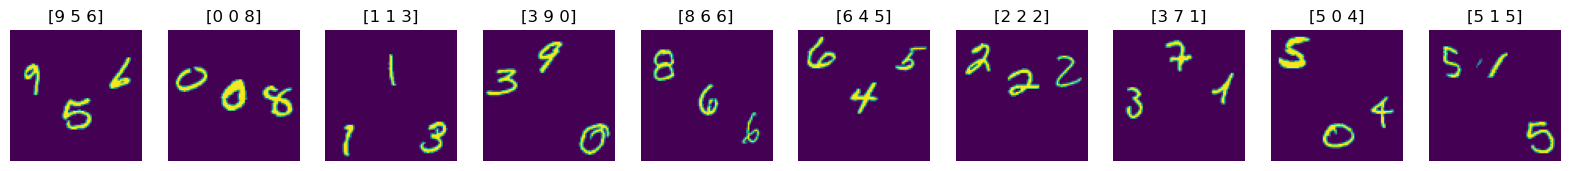

In [132]:
import random

# Set the random seed for reproducibility
random.seed(42)

# Pick 20 random indices
# Print the corresponding y_test and x_test values

from random import Random
rand = Random()
plt.figure(figsize=(20, 2))
for i in range(0, 10):
    plt.subplot(1,10, i + 1)
    x = rand.randint(0, len(x_test) - 1)  # select a random index from x_train data
    print(f'test = {y_test[x]}  ===> predicted = {combined_numbers[x]}')
    plt.imshow(x_test[x])
    plt.title(y_test[x])
    plt.axis('off')
    #print y_pred
   
    
plt.show()



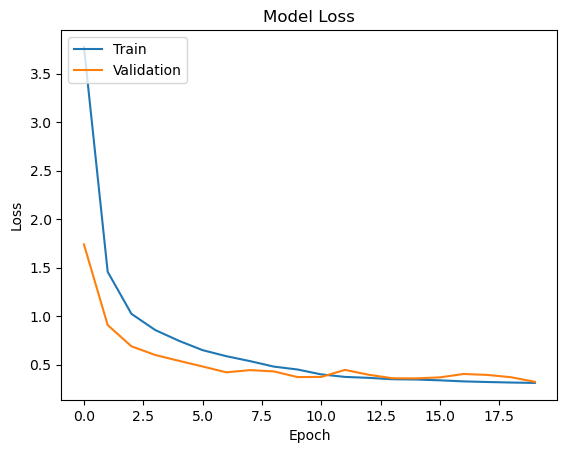

In [129]:
# sketch graph between train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

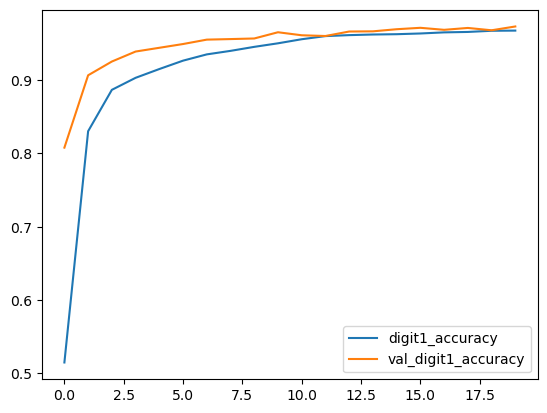

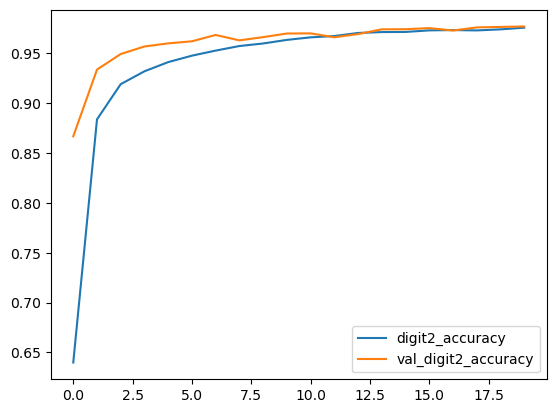

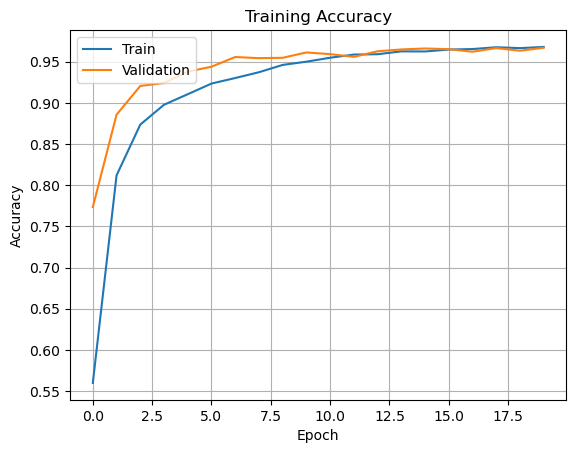

In [130]:
train_perf = pd.DataFrame(history.history)
#get the column names
train_perf.columns

train_perf[['digit1_accuracy', 'val_digit1_accuracy']].plot()

train_perf[['digit2_accuracy', 'val_digit2_accuracy']].plot()
train_perf[['digit3_accuracy', 'val_digit3_accuracy']].plot()

plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.xlabel('Epoch')
plt.title('Training Accuracy')
plt.grid()
plt.show()

[[6245    0    7    0    0    2   27    2   17    0]
 [ 160 5584   17    1   12    0    7   16    2    1]
 [ 312    1 4533    8    4    2    2   18   20    0]
 [ 319    0   11 5418    0   22    0   14   14    2]
 [ 155    3    1    0 6395    0    5    1    9   31]
 [ 463    1    0   58    5 6106   19    8   21   19]
 [ 139    2    0    0    7    2 6345    0    5    0]
 [ 213    3   12    0    2    0    0 4755    2   13]
 [ 303    8    6    5   17    8   18    3 6323    9]
 [ 331    0    1    8   44    7    0    8    7 5294]]


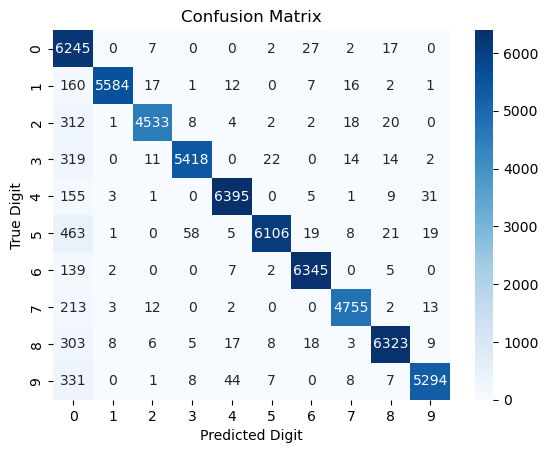

In [131]:
#create confusion maxtrix
from sklearn.metrics import confusion_matrix

# Convert the true labels to 1D arrays
y_true = np.concatenate([y_test[:, 0], y_test[:, 1], y_test[:, 2]])

# Convert the predicted labels to 1D arrays
y_pred = np.concatenate([digit1_classes, digit2_classes, digit3_classes])

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)


# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()
